# Building linear regression model

In [478]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [479]:
# slope and intercept
a = 3
b = -4

X_train = np.arange(0, 10, 0.3, dtype='float32').reshape(-1, 1)

noise = np.random.normal(loc=0.0, scale=3.0, size=X_train.shape)
y_train = (X_train * a + b + noise).flatten()

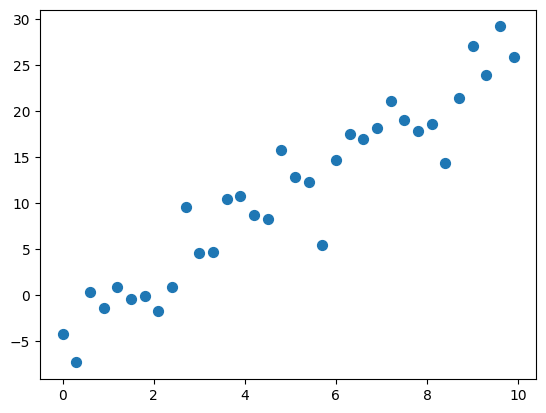

In [480]:
plt.scatter(X_train, y_train, s=50)

In [481]:
# standardize features and target
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)

# Normalize targets
y_mean = np.mean(y_train)
y_std = np.std(y_train)
y_train_norm = (y_train - y_mean) / y_std

# cvt to tensors
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train_norm = torch.from_numpy(y_train_norm).float()

from torch.utils.data import TensorDataset, DataLoader

# create dataset and corresponding dataloader
train_ds = TensorDataset(X_train_norm, y_train_norm)
batch_size = 1
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [482]:
torch.manual_seed(0)

weights = torch.randn(1, requires_grad=True)
#weights.requires_grad_()

bias = torch.zeros(1, requires_grad=True)

def model(xb):
    # linear regression
    return xb @ weights + bias

def loss_fn(input, target):
    return (input - target).pow(2).sum()/len(target)

In [483]:
# Now implement SGD
learning_rate = 0.001
n_epochs = 201
log_epochs = 10

for epoch in range(n_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch) # forward
        loss = loss_fn(pred, y_batch)
        loss.backward() # gradients
    with torch.no_grad():
        weights -= weights.grad * learning_rate
        bias -= bias.grad * learning_rate
        weights.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item():.4f}')

Epoch: 0, Loss: 0.0372
Epoch: 10, Loss: 0.0047
Epoch: 20, Loss: 0.0033
Epoch: 30, Loss: 0.0815
Epoch: 40, Loss: 0.0000
Epoch: 50, Loss: 0.1529
Epoch: 60, Loss: 0.0545
Epoch: 70, Loss: 0.0010
Epoch: 80, Loss: 0.5874
Epoch: 90, Loss: 0.0795
Epoch: 100, Loss: 0.0040
Epoch: 110, Loss: 0.1539
Epoch: 120, Loss: 0.0001
Epoch: 130, Loss: 0.0000
Epoch: 140, Loss: 0.0196
Epoch: 150, Loss: 0.0039
Epoch: 160, Loss: 0.0001
Epoch: 170, Loss: 0.0039
Epoch: 180, Loss: 0.3227
Epoch: 190, Loss: 0.0214
Epoch: 200, Loss: 0.0191


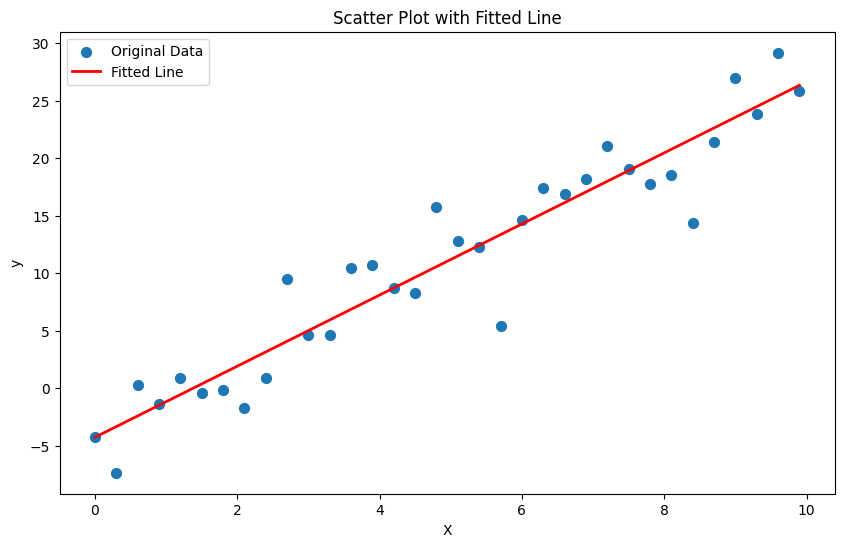

In [484]:
with torch.no_grad():
    y_pred_norm = model(X_train_norm).numpy()
    
y_pred = y_pred_norm * y_std + y_mean

plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Original Data', s=50)
plt.plot(X_train, y_pred, color='red', label='Fitted Line', linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Scatter Plot with Fitted Line')
plt.show()

In [485]:
# now with pytorch more easily

new_loss_fn = torch.nn.MSELoss(reduction='mean')
input_size = 1 # features
output_size = 1 # single value for each input
model = torch.nn.Linear(input_size, output_size)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [486]:
for epoch in range(n_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:,0]
        loss = new_loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step() # update parameters after the SGD
        optimizer.zero_grad() # reset gradients to zero
    if epoch % log_epochs == 0:
        print(f'Epoch: {epoch}, Loss: {loss.item():.4f}')

Epoch: 0, Loss: 0.2360
Epoch: 10, Loss: 0.3014
Epoch: 20, Loss: 0.1854
Epoch: 30, Loss: 0.0170
Epoch: 40, Loss: 0.0066
Epoch: 50, Loss: 0.1543
Epoch: 60, Loss: 0.3126
Epoch: 70, Loss: 0.0941
Epoch: 80, Loss: 0.1347
Epoch: 90, Loss: 0.0072
Epoch: 100, Loss: 0.0195
Epoch: 110, Loss: 0.0137
Epoch: 120, Loss: 0.1779
Epoch: 130, Loss: 0.0214
Epoch: 140, Loss: 0.2940
Epoch: 150, Loss: 0.0224
Epoch: 160, Loss: 0.0137
Epoch: 170, Loss: 0.0228
Epoch: 180, Loss: 0.1780
Epoch: 190, Loss: 0.0001
Epoch: 200, Loss: 0.1038
